# Gradient Descent

In the Ordinary Least Square (OLS), we find the optimal parameters that minimize the cost function. This estimation is rather done in a single iteration as a result the method is also called non-iterative approach for optimization.

>Non-iterative approach is not suitable when
> - $X^TX$ is not invertible</br>
> This causes issues because there is a perfect correlation between two or more independent variables. This means that one variable can be exactly predicted from the others, leading to a situation where $X^TX$ does not have full rank and cannot be inverted. This prevents the use of the normal equation $β = (X^TX)^{-1}X^Ty$ to find the regression coefficients.

> - no of features is larger than the no of samples

OLS method is time consuming as no of features increases. As a result, for larger dataset with large features it creates a problem in time complexity so we use gradient descent.

<img src = "../../assets/gradient_descent_hill.png">

Imagine you're standing on top of a hill, looking to reach the lowest point in the valley below. This journey represents finding the optimal solution to minimize errors in a problem. At the top of the hill, you assess the steepness and direction of the slope, which tells you the best way to move downward. You take steps based on how steep the slope is; if it's very steep, you take larger steps, and if it's gentle, you take smaller steps. These steps guide you gradually down the hill, and you keep adjusting your direction and step size as you go. 

The goal is to keep moving downward until you reach the valley, the point where you can't go any lower. This entire process is akin to an iterative method, like **gradient descent**, where you continuously make adjustments until you find the best solution.


## Gradient Descent Algorithm

Gradient Descent is an iterative optimization algorithm that updates the coefficients gradually by descending along the negative gradient of the cost function. The cost function is typically the SSE, and the algorithm seeks to minimize it. 

The steps of Gradient Descent include:

1. Initialize value of $x$ randomly.
2. Calculate the  gradient of $f(x)$ w.r.t. $x$ </br> $\frac{∂f(x)}{∂x}$
3. Update $x$ as </br> $x:=x-\alpha \frac{∂f(x)}{∂x}$ Where, $\alpha$ is learning rate
4. Repeat steps 1, 2 and 3 until value of $f(x)$ converges to minimum value.

In [1]:
def gradient_descent(gradient, x_init, alpha, max_iters=5000, precision=1e-5):
    x = x_init  # Initialize value of x
    iteration = 0

    path = [(x, f(x))]  # For 3D visualization

    while abs(gradient(x)) > precision and iteration < max_iters:
        x = x - alpha * gradient(x)
        iteration += 1
    x_opt = x
    return x_opt, iteration, path

#### Example:

$f(x) = x^2 + 3x - 5$

$\frac{∂f(x)}{∂x} = 2x^2 + 3$

In [2]:
def f(x):
  return x**2 + 3 * x - 5

def gradient_f(x):
  return 2*x + 3

Now, lets intialize random value for $x$ and choose constant learning rate $\alpha$ between 0 and 1.

In [3]:
x_init = 3.6
alpha = 0.2

x_optimal, iteration, path = gradient_descent(gradient_f, x_init, alpha)
print("optimal x:", x_optimal)
print("min f(x):", f(x_optimal))
print("no. of steps:", iteration)

optimal x: -1.4999968681194706
min f(x): -7.249999999990191
no. of steps: 28


### 3D Visualization of Gradient Descent

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Generate values for plotting the function surface
def plot_3d(path):
    x_vals = np.linspace(-3, 3, 400)
    y_vals = np.linspace(-50, 50, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X**2 + 3 * X - 5

    # Convert path to numpy arrays for plotting
    path_x, path_z = zip(*path)
    path_y = np.zeros_like(path_x)

    # Plot the 3D surface and gradient descent path
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
    ax.plot(path_x, path_y, path_z, color='red', marker='o', markersize=5, linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X)')
    ax.set_title('Gradient Descent on f(x)')

    plt.show()

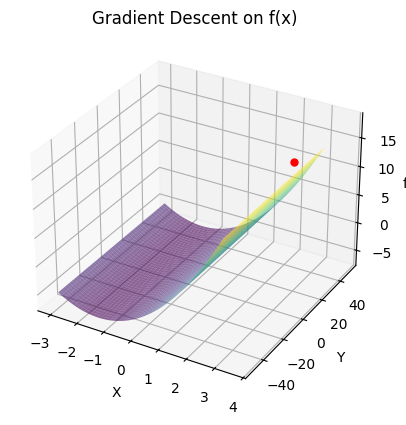

In [6]:
plot_3d(path)

### Role of Learning Rate


In [14]:
alphas = [1, 0.58, 0.1, 0.01]

for alpha in alphas:
    print('Learning Rate:', alpha)
    x_optimal, iteration, path = gradient_descent(gradient_f, x_init, alpha)
    print("optimal x:", x_optimal)
    print("min f(x):", f(x_optimal))
    print("no. of steps:", iteration, '\n')
    
    

Learning Rate: 1
optimal x: 3.5999999999999996
min f(x): 18.759999999999998
no. of steps: 5000 

Learning Rate: 0.58
optimal x: -1.499997809566679
min f(x): -7.249999999995202
no. of steps: 8 

Learning Rate: 0.1
optimal x: -1.4999959983476434
min f(x): -7.249999999983987
no. of steps: 63 

Learning Rate: 0.01
optimal x: -1.4999950176753207
min f(x): -7.249999999975176
no. of steps: 685 



Though learning rate is generally constant throughout the training process, there are other techniques known as **adaptive learning rates** that can vary the learning rates in greater detail in deep learning field.
</br>
>Note:
>- For convex functions, there is one minimum point called global minimum
>- For non-convex functions, there will be multiple minimum points, when using gradient descent, it might get stuck at local minima and never reach global minimum which is one of the biggest disadvantage of the gradient descent algorithm.